In [ ]:
from google.colab import files
files.upload()

Saving positive.csv to positive (1).csv


{'positive.csv': b',tweet_id,created_date,username,location,retweeted_username,content_type,mentioned_users,text,positive_sent_score,negative_sent_score,compound_sent_score\r\n1,1497607577676439563,Sat Feb 26 16:20:45 +0000 2022,Milly Fawcett,"England, United Kingdom",Milly Fawcett,Tweet (self-loop),"[\'Robert Peston\', \'Dept for BEIS\', \'ecotricity\']","@Peston All of a sudden @beisgovuk wonders why they didn\xe2\x80\x99t invest more in #renewableenergy \xf0\x9f\xa4\x94\n\n#GreenEnergy #windpower @ecotricity #renewable #energy https://t.co/hcHmmwcg5z",9.1,0.0,0.0\r\n2,1497607363284586505,Sat Feb 26 16:19:54 +0000 2022,Dr. Mani DasGupta,"England, United Kingdom",Jo\xc3\xa3o Pedro Costa \xf0\x9f\x8c\xbb\xf0\x9f\x92\x9a\xf0\x9f\x87\xb5\xf0\x9f\x87\xb9\xf0\x9f\x87\xba\xf0\x9f\x87\xa6\xf0\x9f\x87\xaa\xf0\x9f\x87\xba\xf0\x9f\x87\xac\xf0\x9f\x87\xa7,RT,[\'Jo\xc3\xa3o Pedro Costa \xf0\x9f\x8c\xbb\xf0\x9f\x92\x9a\xf0\x9f\x87\xb5\xf0\x9f\x87\xb9\xf0\x9f\x87\xba\xf0\x9f\x87\xa6\xf0\x9f\x87\xaa

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import accuracy_score

import networkx as nx

In [ ]:
df = pd.read_csv('positive.csv')
df.head()
len(df)

8200

In [ ]:
df['location'].value_counts()
(df['username'] + df['retweeted_username']).nunique()

5950

In [ ]:
df2 = df[['username','retweeted_username','content_type']]

In [ ]:
array = []

for i in df2.index:
    array.append((df2.loc[i,'username'],df2.loc[i,'retweeted_username']))

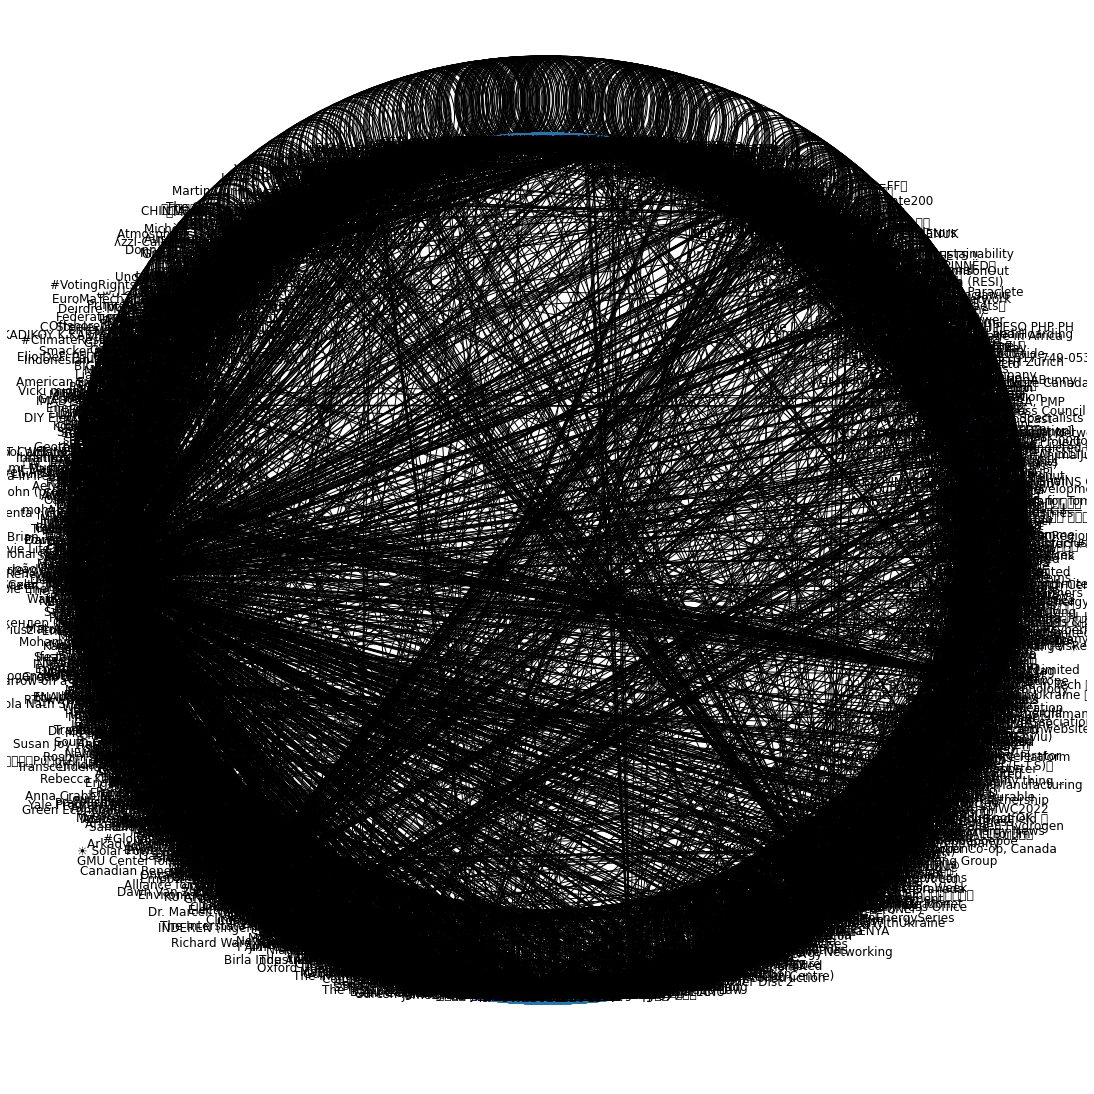

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.font_manager
matplotlib.font_manager._rebuild()

G_karate = nx.Graph()

for i in df2.index:
    G_karate.add_edge(df2.loc[i,'username'],df2.loc[i,'retweeted_username'])   

from matplotlib.pyplot import figure
figure(figsize=(15, 15))
nx.draw_shell(G_karate, with_labels = True)

In [ ]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [ ]:
# G_karate = nx.karate_club_graph() ## Only change made


# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
print(f"The karate club has {len(communities)} communities.")

The karate club has 1344 communities.


In [ ]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [ ]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]


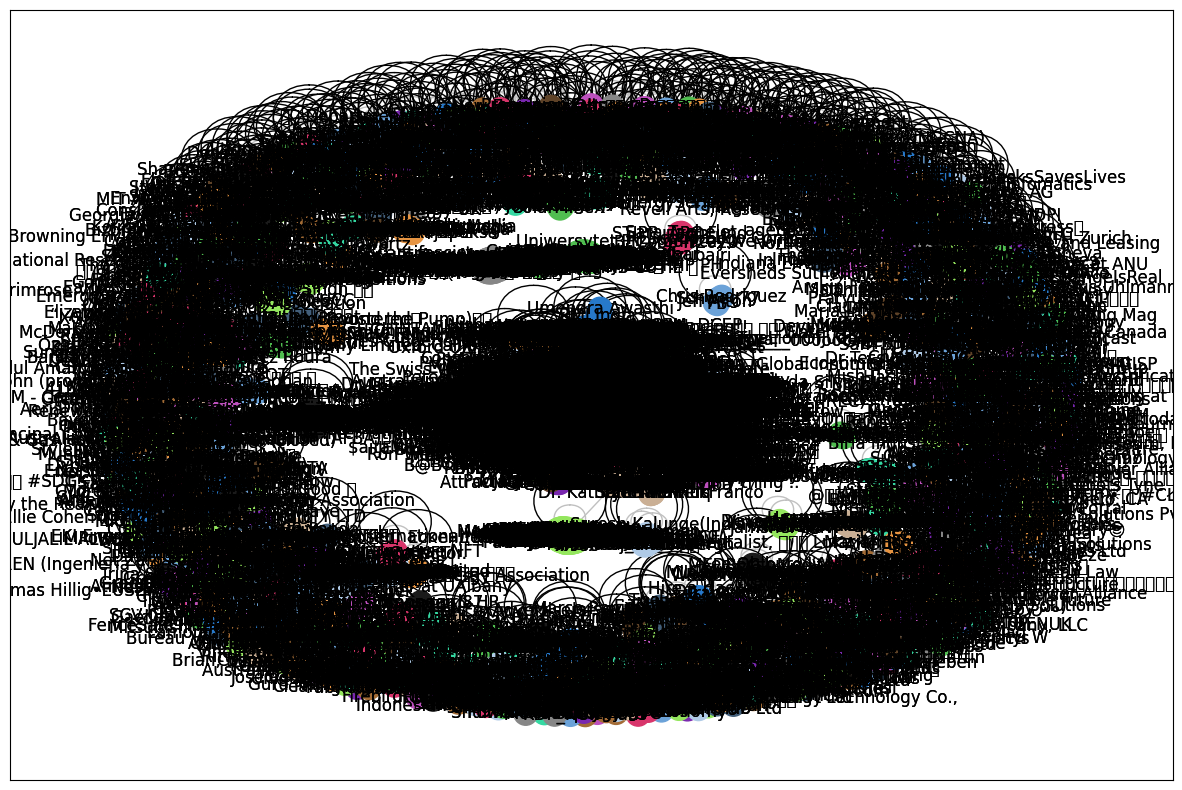

In [ ]:
karate_pos = nx.spring_layout(G_karate)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

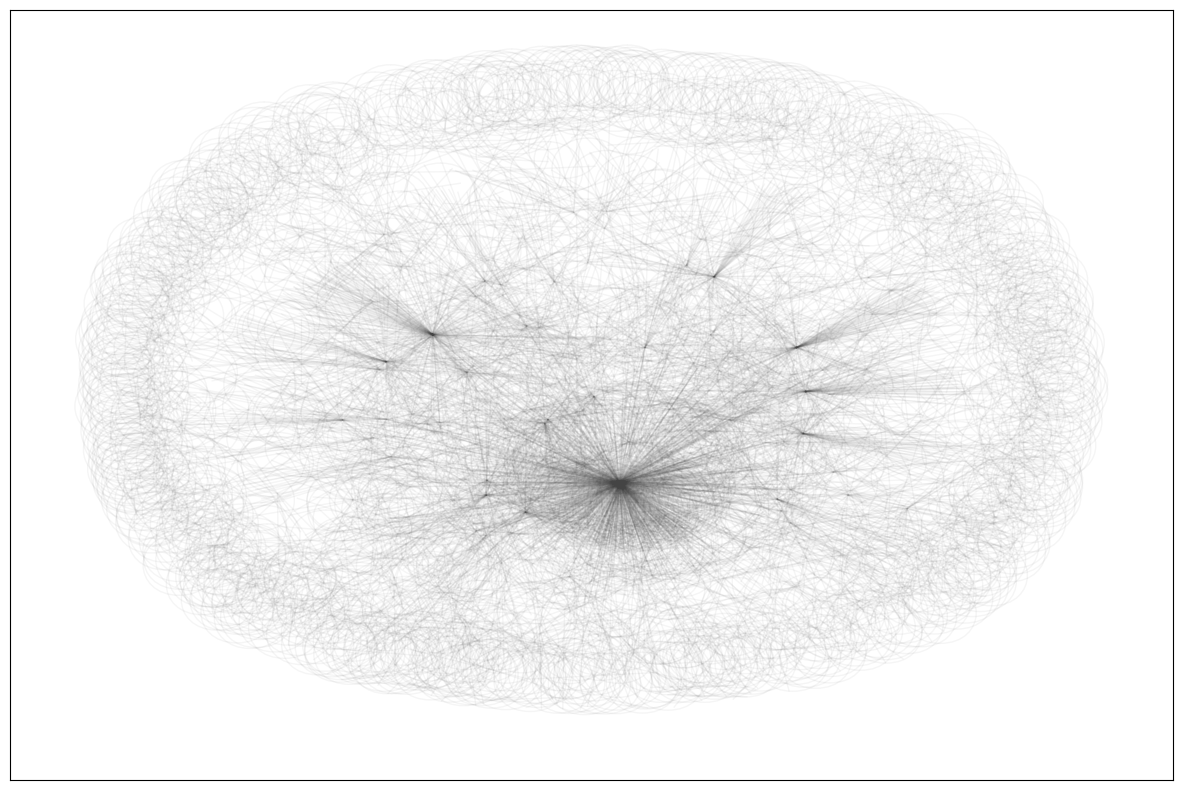

In [ ]:
pos = nx.spring_layout(G_karate, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_karate,
    pos=pos,
    node_size=0,
    edge_color="#444444",
    alpha=0.05,
    with_labels=False)

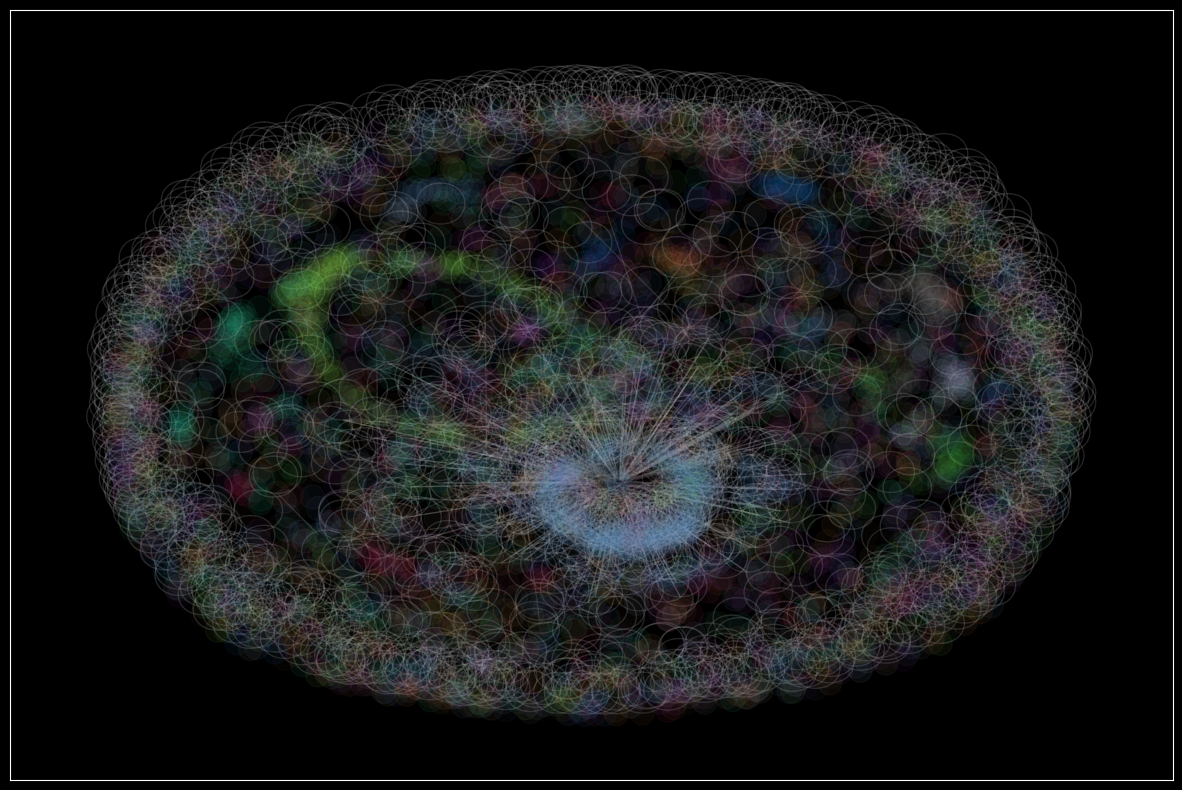

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)
# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
# external edges
nx.draw_networkx(
    G_karate,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    G_karate, pos=pos,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05,
    with_labels=False)


In [ ]:
from collections import Counter
from nltk import word_tokenize
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
for i in range(5):
  def com1(s):
      if s in list(communities[i]):
          return True
      else:
          return False

  df[df['username'].map(com1)][['username','text']]

  temp_df = df[df['username'].map(com1)][['username','text']]
  " ".join(list(temp_df['text'])) 

  counter = Counter(" ".join(list(temp_df['text'])))
  text = " ".join(list(temp_df['text']))
  tokens = word_tokenize(text.lower())
  filtered_tokens = []
  for w in tokens:
    if w not in stop_words:
        filtered_tokens.append(w)
  punc = ['.','#', '#', '!', ';', '&', '?', '-', 'rt', '%', '$', ')', '(', '_', '...', ':', '@']
  filtered_tokens_1 = []
  for w in filtered_tokens:
    if w not in punc:
        filtered_tokens_1.append(w)
  counter = Counter(filtered_tokens_1)
  print({k: v for k, v in sorted(counter.items(), reverse = True, key=lambda item: item[1])})
  print("------------------------------------------")

{'https': 1700, 'renewableenergy': 1554, 'energy': 1310, ',': 1246, 'solar': 544, 'renewable': 427, 'renewables': 325, '’': 296, 'amp': 289, 'power': 262, 'solarenergy': 217, 'ev': 209, "'s": 190, 'tesla': 188, 'wind': 186, 'climatechange': 179, 'solarpower': 177, 'cleanenergy': 175, 'new': 170, 'sustainability': 166, 'industry': 162, 'clean': 153, 'greenenergy': 141, 'us': 136, 'green': 136, 'hydrogen': 133, 'electricvehicles': 130, 'climate': 126, 'sustainable': 113, 'transition': 108, 'get': 108, 'incentives': 106, 'electricity': 105, '…': 99, 'zxcxz_xyz': 99, 'market': 97, 'today': 95, 'carbon': 92, 'india': 91, 'future': 91, 'budget2022': 89, 'read': 88, 'help': 88, 'join': 82, 'via': 81, 'one': 81, 'increased': 79, 'storage': 79, '``': 73, 'financial': 72, 'project': 69, 'reflect': 68, 'projects': 68, 'though': 67, 'solarpanels': 66, 'free': 66, 'world': 66, 'news': 66, 'unambiguous': 65, 'year': 64, 'solutions': 63, 'africa': 63, 'using': 62, 'solarpv': 62, 'support': 62, 'focus

In [ ]:
def com1(s):
    if s in list(communities[0]):
        return True
    else:
        return False

df_temp = df[df['username'].map(com1)][['username','retweeted_username']]
df_temp2 = pd.DataFrame(columns=['username','retweeted_username'])
df_temp2['username'] = df_temp['retweeted_username']
df_temp2['retweeted_username'] = df_temp['username']

df_temp3 = pd.concat([df_temp2, df_temp])
df_temp3 = df_temp3.drop_duplicates()

In [ ]:
df_c = pd.crosstab(df_temp3['username'],df_temp3['retweeted_username'], rownames=['username'], colnames =['retweeted_username'])

for i in range(len(df_c)):
    for j in range(len(df_c)):
        if df_c.iloc[i,j] > 0:
            df_c.iloc[i,j] = 1
        if i == j:
            df_c.iloc[i,j] = 1 

mat = np.matrix(df_c)

G=nx.from_numpy_matrix(mat)

In [ ]:
a=dict(nx.centrality.betweenness_centrality(G,weight='weight'))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
#myvalues=a.get(mykeys)
df_c.columns.values[mykeys]   

array(['energyreferral.xyz', 'John Snowmountainer', 'Bob Sacamano',
       'Tramikatodor', 'Andreas Iliou', 'renewables', 'JFSebastian146',
       'zxcxz', 'Alexis TTh', 'Fuel Cells Works',
       'Earth Soldier Lifestyle', 'Climate Reality Project NYC',
       'NES Fircroft', 'Southern Idaho Economic Development',
       'Digital Discom Pvt Ltd'], dtype=object)

In [ ]:
a = dict(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
df_c.columns.values[mykeys]

array(['energyreferral.xyz', 'John Snowmountainer', 'RENVU', 'plopandrew',
       'Andreas Iliou', 'Cliantech Solutions',
       'Haliburton Solar and Wind', 'North American Clean Energy',
       'Siddhant Dongare', 'Windergy India',
       'Southern Idaho Economic Development', 'Mr.Graphite',
       "mworia m'inoti", 'Leaders in Energy', 'YellowLite'], dtype=object)

In [ ]:
def com1(s):
    if s in list(communities[3]):
        return True
    else:
        return False

df_temp = df[df['username'].map(com1)][['username','retweeted_username']]
df_temp2 = pd.DataFrame(columns=['username','retweeted_username'])
df_temp2['username'] = df_temp['retweeted_username']
df_temp2['retweeted_username'] = df_temp['username']

df_temp3 = pd.concat([df_temp2, df_temp])
df_temp3 = df_temp3.drop_duplicates()

In [ ]:
df_c = pd.crosstab(df_temp3['username'],df_temp3['retweeted_username'], rownames=['username'], colnames =['retweeted_username'])

for i in range(len(df_c)):
    for j in range(len(df_c)):
        if df_c.iloc[i,j] > 0:
            df_c.iloc[i,j] = 1
        if i == j:
            df_c.iloc[i,j] = 1 

mat = np.matrix(df_c)

G=nx.from_numpy_matrix(mat)

In [ ]:
a=dict(nx.centrality.betweenness_centrality(G,weight='weight'))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
#myvalues=a.get(mykeys)
df_c.columns.values[mykeys]   

array(['Sustainable Energy Week', 'Complast Ltd', 'Energy4Europe 🇪🇺',
       'bgkmsc', 'CINEA🇪🇺', 'James Gingerich, @Expeflow #WorkEasier #RPA',
       'Gema San Bruno', 'European Investment Bank', 'Maria Kritsiligkou',
       'UN Climate Change:Learn', 'LeonardoBarretoGomez', 'Stardust',
       'IntelStor', 'MAtchUP', 'Venizelos Efthymiou'], dtype=object)

In [ ]:
a = dict(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))
mykeys = sorted(a, key = a.get, reverse = True)[:15]
df_c.columns.values[mykeys]

array(['Sustainable Energy Week', 'Complast Ltd', 'Energy4Europe 🇪🇺',
       'Gema San Bruno', 'CINEA🇪🇺', 'PLATOON #DigitalEnergy 🇪🇺 Project',
       'bgkmsc', 'EU Environment', 'EU_ScienceHub', 'Maria Kritsiligkou',
       'Stardust', 'Venizelos Efthymiou', 'nikkifirewall', 'sciencenews',
       'Amina Ariana Lang'], dtype=object)

In [ ]:
len(communities[0]), len(communities[1]), len(communities[2]), len(communities[3])

(515, 190, 159, 135)

In [ ]:
df

Unnamed: 0             tweet_id  ... negative_sent_score compound_sent_score
0              1  1497607577676439563  ...                 0.0                 0.0
1              2  1497607363284586505  ...                 0.0                 0.0
2              4  1497607037936570377  ...                 4.0                 4.0
3              5  1497606972346183686  ...                 0.0                 0.0
4              6  1497606781086085121  ...                 0.0                 0.0
...          ...                  ...  ...                 ...                 ...
8195       13919  1494607013153808400  ...                 0.0                 0.0
8196       13920  1494606541978279945  ...                 0.0                 0.0
8197       13921  1494606081649221632  ...                 0.0                 0.0
8198       13922  1494606001093423104  ...                 0.0                 0.0
8199       13924  1494604938839793671  ...                 0.0                 0.0

[8200 rows x 12 columns]

In [ ]:
df_temp = df[df['username'].map(com1)][['username','retweeted_username']] #df2[['username','retweeted_username']]

print('tweets', sum(df['username'].map(com1)))
df_temp2 = pd.DataFrame(columns=['username','retweeted_username'])
print('users', len(df_temp.drop_duplicates()))
df_temp2['username'] = df_temp['retweeted_username']
df_temp2['retweeted_username'] = df_temp['username']

df_temp3 = pd.concat([df_temp2, df_temp])
df_temp3 = df_temp3.drop_duplicates()

tweets 249
users 185
